**ids-pdl08-tut.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the _Python Data Lab_ of the module _Introduction to Data Science_ offered in Fall 2022 at Jacobs University Bremen. Module instructors are Hilke Brockmann, Adalbert Wilhelm, and Joachim Vogt. Jupyter notebooks and other learning resources are available from a dedicated _module platform_.

# Pandas basics

This tutorial provides an introduction to the Python package Pandas. Follow the instructions below to learn to

- [ ] construct Pandas Series objects from dictionaries, lists, and arrays,
- [ ] select elements in a Pandas Series using label-based and integer-based methods,
- [ ] construct Pandas DataFrame objects from dictionaries, lists, and arrays,
- [ ] select elements in a Pandas DataFrame using label-based and integer-based methods,
- [ ] join/merge Pandas DataFrame objects, 
- [ ] operate on columns in a Pandas DataFrame, and add new columns,
- [ ] store tabular data from a file in a Pandas DataFrame,
- [ ] extract and restructure tabular data using Pandas DataFrame objects.

If you wish to keep track of your progress, you may edit this markdown cell, check a box in the list above after having worked through the respective part of this notebook, and save the file.

*Short exercises* are embedded in this notebook. *Sample solutions* can be found at the end of the document.

## Preparation

The following data file is expected to reside in the working directory. Identify the file on the module platform and upload it to the same folder as this Jupyter notebook.

- `life-expectancy-at-birth-total-years.csv`: Life expectancy at birth 1960-2019, published by the [World Bank, 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), available from [Our World in Data](https://ourworldindata.org/grapher/life-expectancy-at-birth-total-years).

Run the following code cell to import standard Python data science libraries. The NumPy module facilitates efficient processing of numerical arrays, and is usually imported as `np`. From the matplotlib library we import the package `pyplot` using the standard abbreviation `plt`. The magic command `%matplotlib inline` (IPython shell) allows for inline display of graphics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Pandas

It is common practice to import the Pandas library using the prefix `pd`.

In [3]:
import pandas as pd

### Pandas documentation and tutorials

Pandas is hosted at [https://pandas.pydata.org](https://pandas.pydata.org), with extensive [documentation](https://pandas.pydata.org/docs) and [tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/). If you are familiar with other tools for analyses of tabular data (R, SQL, spreadsheets, SAS, Stata), it may be worthwhile comparing terminologies, see the page [Comparisons with other tools](https://pandas.pydata.org/docs/getting_started/comparisons/).

Note the official spelling is *pandas* (lower case). In this tutorial the package name is capitalized (*Pandas*) to avoid confusion with a bunch of bears.

## Pandas Series

A Pandas Series object stores a one-dimensional labeled array, similar to a Python dictionary, but amended and optimized for data science operations. Python dictionaries relate to Pandas Series objects in a similar way as Python lists relate to NumPy ndarray objects, with the former being more flexible regarding data types, and the latter being optimized for efficient numerical processing.

### Pandas Series from Python dictionaries

Recall that Python dictionaries are collections of key:value pairs.

In [4]:
dct1 = { 'a':10, 'b':20 , 'c':30, 'd':40}
print('Dictionary : ',dct1)
print('Keys       : ',dct1.keys())
print('Values     : ',dct1.values())

Dictionary :  {'a': 10, 'b': 20, 'c': 30, 'd': 40}
Keys       :  dict_keys(['a', 'b', 'c', 'd'])
Values     :  dict_values([10, 20, 30, 40])


When a Python dictionary is turned into a Pandas Series object, the keys are stored in a Pandas Index object.

In [5]:
ser1 = pd.Series(dct1)
print('Series :')
print(ser1)
print('\nIndex  : ',ser1.index)
print('Values : ',ser1.values)

Series :
a    10
b    20
c    30
d    40
dtype: int64

Index  :  Index(['a', 'b', 'c', 'd'], dtype='object')
Values :  [10 20 30 40]


### Pandas Series from Python lists and NumPy arrays

Series can be constructed not only from dictionaries but also from lists or ndarray objects, with the index array provided through a keyword argument of the `Series()` function. 

In [6]:
ser2 = pd.Series([10,20,30,40],index=['a','b','c','d'])
print(ser2)

a    10
b    20
c    30
d    40
dtype: int64


If a Series is defined without explicit reference to an index, it is derived from the integer positions.

In [7]:
ser3 = pd.Series([10,20,30,40])
print(ser3)
print('\nIndex  : ',ser3.index)

0    10
1    20
2    30
3    40
dtype: int64

Index  :  RangeIndex(start=0, stop=4, step=1)


### Selection of elements in a Pandas Series

The most intuitive way of selecting individual elements of a Series is through the index. Slicing produces another Series object, with the end element included in the result. The `values` attribute extracts the array of elements.

In [8]:
ser1 = pd.Series( { 'a':10, 'b':20 , 'c':30, 'd':40} )
print("ser1['c'] : ",ser1['c'])
print("ser1['b':'d'].values : ",ser1['b':'d'].values)
print("\nser1['b':'d'] : ")
print(ser1['b':'d'])

ser1['c'] :  30
ser1['b':'d'].values :  [20 30 40]

ser1['b':'d'] : 
b    20
c    30
d    40
dtype: int64


Series elements may also be referenced through their integer position along the index, with the usual logic of Python lists and NumPy arrays (e.g., end elements are omitted).

In [9]:
print("ser1[2] : ",ser1[2])
print("ser1[1:3].values : ",ser1[1:3].values)
print("\nser1[1:3] : ")
print(ser1[1:3])

ser1[2] :  30
ser1[1:3].values :  [20 30]

ser1[1:3] : 
b    20
c    30
dtype: int64


In cases where the index is formed from an array of integers, slicing may lead to ambiguities, and then it is saver to reference objects through `.loc` (label-based selection) and `.iloc` (integer-based selection).

In [10]:
ser4 = pd.Series( { 1:10, 2:20, 3:30, 4:40 } )
print("ser4 : ")
print(ser4)
print("\nser4[1:3].values      : ",ser4[1:3].values)
print("ser4.loc[1:3].values  : ",ser4.loc[1:3].values)
print("ser4.iloc[1:3].values : ",ser4.iloc[1:3].values)

ser4 : 
1    10
2    20
3    30
4    40
dtype: int64

ser4[1:3].values      :  [20 30]
ser4.loc[1:3].values  :  [10 20 30]
ser4.iloc[1:3].values :  [20 30]


The referencing syntax can be applied to re-assign values, or even define a new element to th Series.

In [11]:
ser5 = pd.Series( { 'a':10, 'b':20 , 'c':30, 'd':40} )
print(ser5)
ser5['c'] = 33
ser5['e'] = 55
print()
print(ser5)

a    10
b    20
c    30
d    40
dtype: int64

a    10
b    20
c    33
d    40
e    55
dtype: int64


### Operations on Series objects

Operations involving two or more Series objects are naturally aligned with common elements of their index arrays. In the following example, the two Series objects `ser1` and `ser6` share the indices `a`, `c`, `d` but not `b` and `e`. The object `ser7`, defined through an operation involving both `ser1` and `ser6`, contains all index elements from both Series objects but the associated values are defined only for those indices that are shared.

In [12]:
ser1 = pd.Series( { 'a':10, 'b':20 , 'c':30, 'd':40} )
ser6 = pd.Series( { 'a':1, 'c':3 , 'd':4, 'e':5 } )
ser7 = ser1-ser6
print(ser7)

a     9.0
b     NaN
c    27.0
d    36.0
e     NaN
dtype: float64


Undefined values (`ǸaN`, not-a-number) can be eliminated from a Series by means of the `dropna()` method, with the keyword `inplace` controlling if the Series itself is altered, or a copy is produced (default behavior).

In [13]:
ser7.dropna(inplace=True)
print(ser7)

a     9.0
c    27.0
d    36.0
dtype: float64


### Exercise: Pandas Series

According to [Wikipedia (accessed on 2022-07-26)](https://de.wikipedia.org/wiki/Liste_der_Gro%C3%9F-_und_Mittelst%C3%A4dte_in_Deutschland), the resident numbers of Bremen, Dresden, Essen, Stuttgart in the years 1970, 1990, 2010 were as follows.

 City      | 1970   | 1990   | 2010   | 
:----------|:------:|:------:|:------:|
 Bremen    | 592533 | 551219 | 547340 |
 Dresden   | 502432 | 490571 | 523058 |
 Essen     | 696419 | 626973 | 574635 |
 Stuttgart | 634202 | 579988 | 606588 |

In the cell below, store the three sets of resident numbers for the years 1970, 1990, 2010 in Pandas Series `ser1970`, `ser1990`, `ser2010`, respectively, and complete the code according to the instructions given as comments.

In [14]:
### Construct ser1970 from a dictionary.
ser1970 = pd.Series({'Bremen':592533,'Dresden':502432,'Essen':696419,'Stuttgart':634202})
print('Residents in the year 1970:')
print(ser1970)
### Construct ser1990 using a list of resident numbers and a separate index array.
ser1990 = pd.Series([551219,490571,626973,579988],
                    index=['Bremen','Dresden','Essen','Stuttgart'])
print('\nResidents in the year 1990:')
print(ser1990)
### Copy ser1990 to initialize ser2010, and then re-assign the four values.
ser2010 = ser1990.copy()
ser2010['Bremen'] = 547340
ser2010['Dresden'] = 523058
ser2010['Essen'] = 574635
ser2010['Stuttgart'] = 606588
print('\nResidents in the year 2010:')
print(ser2010)
### Compute the change from 1970 to 1990 and store in serdiff1
serdiff1 = 100*(ser1990-ser1970)/ser1970
print('\nPercentage change in resident number from 1970 to 1990:')
print(serdiff1)
### Compute the percentage change from 1990 to 2010 and store in serdiff2
serdiff2 = 100*(ser2010-ser1990)/ser1990
print('\nPercentage change in resident number from 1990 to 2010:')
print(serdiff2)

Residents in the year 1970:
Bremen       592533
Dresden      502432
Essen        696419
Stuttgart    634202
dtype: int64

Residents in the year 1990:
Bremen       551219
Dresden      490571
Essen        626973
Stuttgart    579988
dtype: int64

Residents in the year 2010:
Bremen       547340
Dresden      523058
Essen        574635
Stuttgart    606588
dtype: int64

Percentage change in resident number from 1970 to 1990:
Bremen      -6.972439
Dresden     -2.360717
Essen       -9.971870
Stuttgart   -8.548380
dtype: float64

Percentage change in resident number from 1990 to 2010:
Bremen      -0.703713
Dresden      6.622283
Essen       -8.347728
Stuttgart    4.586302
dtype: float64


## Pandas DataFrame

A Pandas DataFrame object stores a two-dimensional labeled array, producing a spreadsheet-like representation of the data.

### Construction of Pandas DataFrame objects

Pandas DataFrame objects can be constructed in many different ways, e.g., from a dictionary of lists or NumPy arrays having the same length. Column titles are automatically generated from the keys of the dictionary.

In [15]:
df1 = pd.DataFrame( {'City':['Bremen','Dresden','Essen','Stuttgart'],
                     'Residents in 1970':[592533,502432,696419,634202],
                     'Residents in 1990':[551219,490571,626973,579988],
                     'Residents in 2010':[547340,523058,574635,606588]} )
display(df1)
print('Index : ',df1.index)

,City,Residents in 1970,Residents in 1990,Residents in 2010
0,Bremen,592533,551219,547340
1,Dresden,502432,490571,523058
2,Essen,696419,626973,574635
3,Stuttgart,634202,579988,606588


Index :  RangeIndex(start=0, stop=4, step=1)


Since an index is not explicitly specified, the integer positions of the list or array elements are used. As for Pandas Series, this default behavior can be changed by means of the keyword `index`.

In [16]:
df2 = pd.DataFrame( {'Residents in 1970':[592533,502432,696419,634202],
                     'Residents in 1990':[551219,490571,626973,579988],
                     'Residents in 2010':[547340,523058,574635,606588]},
                   index=['Bremen','Dresden','Essen','Stuttgart'])
display(df2)
print('Index : ',df2.index)

,Residents in 1970,Residents in 1990,Residents in 2010
Bremen,592533,551219,547340
Dresden,502432,490571,523058
Essen,696419,626973,574635
Stuttgart,634202,579988,606588


Index :  Index(['Bremen', 'Dresden', 'Essen', 'Stuttgart'], dtype='object')


The (named) columns of a DataFrame can be understood as individual Pandas Series with shared index arrays.

In [17]:
cities = ['Bremen','Dresden','Essen','Stuttgart']
ser1970 = pd.Series([592533,502432,696419,634202],index=cities)
ser1990 = pd.Series([551219,490571,626973,579988],index=cities)
ser2010 = pd.Series([547340,523058,574635,606588],index=cities)
df3 = pd.DataFrame({'Residents in 1970':ser1970,
                    'Residents in 1990':ser1990,
                    'Residents in 2010':ser2010})
display(df3)
print('Index : ',df3.index)

,Residents in 1970,Residents in 1990,Residents in 2010
Bremen,592533,551219,547340
Dresden,502432,490571,523058
Essen,696419,626973,574635
Stuttgart,634202,579988,606588


Index :  Index(['Bremen', 'Dresden', 'Essen', 'Stuttgart'], dtype='object')


If the data are available as a two-dimensional array, a DataFrame object can be constructed by specifying the titles of both the rows (keyword `index`) and the columns (keyword `columns`).  

In [18]:
res2d = np.array([[592533,551219,547340],
                  [502432,490571,523058],
                  [696419,626973,574635],
                  [634202,579988,606588]])
df4 = pd.DataFrame(res2d,index=['Bremen','Dresden','Essen','Stuttgart'],
                   columns=['Residents in 1970','Residents in 1990','Residents in 2010'])
display(df4)

,Residents in 1970,Residents in 1990,Residents in 2010
Bremen,592533,551219,547340
Dresden,502432,490571,523058
Essen,696419,626973,574635
Stuttgart,634202,579988,606588


Results of operations on columns can be easily included in the DataFrame. In the following example, the percentage changes 1970-1990 and 1990-2010 are computed and included in the DataFrame as two additional columns.

In [19]:
df5 = pd.DataFrame(res2d,index=['Bremen','Dresden','Essen','Stuttgart'],
                   columns=['Residents in 1970','Residents in 1990','Residents in 2010'])
df5['Change 1970-1990 [%]'] = 100*(df5['Residents in 1990']-df5['Residents in 1970'])/df5['Residents in 1970']
df5['Change 1990-2010 [%]'] = 100*(df5['Residents in 2010']-df5['Residents in 1990'])/df5['Residents in 1990']
display(df5)

,Residents in 1970,Residents in 1990,Residents in 2010,Change 1970-1990 [%],Change 1990-2010 [%]
Bremen,592533,551219,547340,-6.972439,-0.703713
Dresden,502432,490571,523058,-2.360717,6.622283
Essen,696419,626973,574635,-9.971870,-8.347728
Stuttgart,634202,579988,606588,-8.548380,4.586302


Pandas DataFrame objects can be constructed directly from data files in a variety of formats. See, e.g., the documentation of the Pandas functions `read_csv()`, `read_excel()`, `read_sql()`. 

### Selection of elements in a Pandas DataFrame

Element selection in Pandas DataFrame objects is demonstrated using the following example.

In [20]:
arr2d = np.arange(15).reshape(3,5)
df6 = pd.DataFrame(arr2d,index=['one','two','three'],columns=['A','B','C','D','E'])
display(df6)

,A,B,C,D,E
one,0,1,2,3,4
two,5,6,7,8,9
three,10,11,12,13,14


To select a *single column* from a Pandas DataFrame, it suffices to index it with the corresponding label, i.e., to enter the label in square brackets. The result is returned as a Pandas Series.

In [21]:
display(df6['B'])

one       1
two       6
three    11
Name: B, dtype: int64

While entering a single label in square brackets (*indexing*) selects a column, a range of labels (*slicing*) affects the rows.

In [22]:
display(df6['one':'two'])

,A,B,C,D,E
one,0,1,2,3,4
two,5,6,7,8,9


For more general selections based on labels (for both rows and columns), apply the `.loc` method, accepting row (index) and column specifications separated by a comma in a variety of formats. One may also specify lists of column or rows, or boolean masks. In the following code cell, uncomment individual lines to see the effects of the selection.

In [23]:
display(df6.loc[:,'B'])                 #.. Single column returned as a Series.
display(df6.loc[:,'B':'D'])             #.. Range of columns returned as a DataFrame.
display(df6.loc['one',:])               #.. Single row returned as a Series.
display(df6.loc['one':'two',:])         #.. Range of rows returned as a DataFrame.
display(df6.loc['one':'two','B':'D'])   #.. Sub-array returned as a DataFrame.
display(df6.loc['one':'two',['B','D']]) #.. Sub-array returned as a DataFrame.
display(df6.loc[df6['B']>3,:])          #.. Select rows where df['B']>3.

one       1
two       6
three    11
Name: B, dtype: int64

,B,C,D
one,1,2,3
two,6,7,8
three,11,12,13


A    0
B    1
C    2
D    3
E    4
Name: one, dtype: int64

,A,B,C,D,E
one,0,1,2,3,4
two,5,6,7,8,9


,B,C,D
one,1,2,3
two,6,7,8


,B,D
one,1,3
two,6,8


,A,B,C,D,E
two,5,6,7,8,9
three,10,11,12,13,14


Selections based on the integer positions within a Pandas DataFrame are accomplished by the `.iloc` method.  In the following code cell, uncomment individual lines and observe the results.

In [24]:
display(df6.iloc[:,1])     #.. Single column returned as a Series.
display(df6.iloc[:,1:4])   #.. Range of columns returned as a DataFrame.
display(df6.iloc[0,:])     #.. Single row returned as a Series.
display(df6.iloc[:-1,:])   #.. Range of rows returned as a DataFrame.
display(df6.iloc[[:-1],1:4]) #.. Sub-array returned as a DataFrame.

SyntaxError: invalid syntax (3051845808.py, line 5)

Further options for selecting elements of a DataFrame are the `.at`, `.iat`, `.ix` methods, see the Pandas documentation.

### Operations on DataFrame objects

The Pandas package builds on the NumPy module with its efficient array handling and numerical operations. NumPy universal functions can be applied to Pandas objects in accordance with requirements regarding their indices (index preservation and alignment).

In [25]:
arr1d = np.arange(8).reshape(4,2)
df7 = pd.DataFrame(arr1d,index=['a','b','c','d'],columns=['x','y'])
df7['sqrt(x)'] = np.sqrt(df7['x'])
df7['sin(pi*x/4)'] = np.sin(np.pi*df7['x']/4)
df7['exp(-y)'] = np.exp(-df7['y'])
df7['y^2-x^2'] = df7['y']**2 - df7['x']**2
display(df7)

,x,y,sqrt(x),sin(pi*x/4),exp(-y),y^2-x^2
a,0,1,0.000000,0.000000e+00,0.367879,1
b,2,3,1.414214,1.000000e+00,0.049787,5
c,4,5,2.000000,1.224647e-16,0.006738,9
d,6,7,2.449490,-1.000000e+00,0.000912,13


The concepts of index preservation and alignment are demonstrated also in the following example where two Pandas Series with non-identical index arrays are combined into a DataFrame. Missing values (`NaN`) are naturally propagated in the operations. 

In [26]:
xs = pd.Series([0,2,4,6],index=['a','b','c','d'])
ys = pd.Series([1,3,5,7],index=['a','b','c','e'])
df8 = pd.DataFrame({'x':xs,'y':ys})
df8['sqrt(x)'] = np.sqrt(df8['x'])
df8['sin(pi*x/4)'] = np.sin(np.pi*df8['x']/4)
df8['exp(-y)'] = np.exp(-df8['y'])
df8['y^2-x^2'] = df8['y']**2 - df8['x']**2
display(df8)

,x,y,sqrt(x),sin(pi*x/4),exp(-y),y^2-x^2
a,0.0,1.0,0.000000,0.000000e+00,0.367879,1.0
b,2.0,3.0,1.414214,1.000000e+00,0.049787,5.0
c,4.0,5.0,2.000000,1.224647e-16,0.006738,9.0
d,6.0,NaN,2.449490,-1.000000e+00,NaN,NaN
e,NaN,7.0,NaN,NaN,0.000912,NaN


In the same way as for Pandas Series, rows with undefined data can be removed from a DataFrame through `.dropna()`, and an arbitrary row by `.drop()`.

In [27]:
df8.dropna(inplace=True)
display(df8)
df8.drop('b',inplace=True)
display(df8)

,x,y,sqrt(x),sin(pi*x/4),exp(-y),y^2-x^2
a,0.0,1.0,0.000000,0.000000e+00,0.367879,1.0
b,2.0,3.0,1.414214,1.000000e+00,0.049787,5.0
c,4.0,5.0,2.000000,1.224647e-16,0.006738,9.0


,x,y,sqrt(x),sin(pi*x/4),exp(-y),y^2-x^2
a,0.0,1.0,0.0,0.000000e+00,0.367879,1.0
c,4.0,5.0,2.0,1.224647e-16,0.006738,9.0


In the example above, the two Series `x` and `y` are combined based on the union of their indices. Such an operation is called joining or merging. In the cell below, the logic is implemented using DataFrame objects instead of Series.

In [28]:
xdf = pd.DataFrame([0,2,4,6],index=['a','b','c','d'],columns=['x'])
ydf = pd.DataFrame([1,3,5,7],index=['a','b','c','e'],columns=['y'])
df9 = xdf.join(ydf,how='outer')
df9['sqrt(x)'] = np.sqrt(df9['x'])
df9['sin(pi*x/4)'] = np.sin(np.pi*df9['x']/4)
df9['exp(-y)'] = np.exp(-df9['y'])
df9['y^2-x^2'] = df9['y']**2 - df9['x']**2
display(df9)

,x,y,sqrt(x),sin(pi*x/4),exp(-y),y^2-x^2
a,0.0,1.0,0.000000,0.000000e+00,0.367879,1.0
b,2.0,3.0,1.414214,1.000000e+00,0.049787,5.0
c,4.0,5.0,2.000000,1.224647e-16,0.006738,9.0
d,6.0,NaN,2.449490,-1.000000e+00,NaN,NaN
e,NaN,7.0,NaN,NaN,0.000912,NaN


### Exercise: Pandas DataFrame

Complete the code cell below according to the instructions included as comments.

In [29]:
### Define a Pandas DataFrame with columns 'x' and 'y'.
dfxy = pd.DataFrame({'x':np.arange(5,9),'y':np.arange(1,5)},index=list('abcd'))
### Add a new column 'x+y' with the sum of the columns 'x' and 'y'.
dfxy['x+y'] = dfxy['x']+dfxy['y']
### Add a new column 'x-y' with the difference of first two columns 'x' and 'y'.
dfxy['x-y'] = dfxy['x']-dfxy['y']
### Add a new column 'x*y' with the product of first two columns 'x' and 'y'.
dfxy['x*y'] = dfxy['x']*dfxy['y']
### Add a new column 'x/y' with the quotient of first two columns 'x' and 'y'.
dfxy['x/y'] = dfxy['x']/dfxy['y']
### Display the resulting DataFrame.
display(dfxy)
### Using .loc, extract (and display) the column labeled 'x+y'.
display(dfxy.loc[:,'x+y'])
### Using .iloc, extract  (and display) the row labeled 'c'.
display(dfxy.iloc[2,:])
### Using .loc, extract the sub-array with columns 'x-y','x/y' and rows 'b','c'.
display(dfxy.loc['b':'c',['x-y','x/y']])
### Using .iloc, extract the sub-array with columns 'x+y','x-y','x*y' and rows 'a','c'.
display(dfxy.iloc[[0,2],2:5])
### Using .drop(), remove the row 'c' and re-display the DataFrame.
dfxy.drop('c',axis=0,inplace=True)
display(dfxy)

,x,y,x+y,x-y,x*y,x/y
a,5,1,6,4,5,5.000000
b,6,2,8,4,12,3.000000
c,7,3,10,4,21,2.333333
d,8,4,12,4,32,2.000000


a     6
b     8
c    10
d    12
Name: x+y, dtype: int64

x       7.000000
y       3.000000
x+y    10.000000
x-y     4.000000
x*y    21.000000
x/y     2.333333
Name: c, dtype: float64

,x-y,x/y
b,4,3.000000
c,4,2.333333


,x+y,x-y,x*y
a,6,4,5
c,10,4,21


,x,y,x+y,x-y,x*y,x/y
a,5,1,6,4,5,5.0
b,6,2,8,4,12,3.0
d,8,4,12,4,32,2.0


## Life expectancy at birth 1960-2019

The file `life-expectancy-at-birth-total-years.csv` provides data on the life expectancy at birth in the period 1960-2019 as published by the [World Bank on 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), and made available through [Our World in Data](https://ourworldindata.org/grapher/life-expectancy-at-birth-total-years). In the working directory listing, the content of this text file is displayed after clicking on the file name. Data columns are separated by commas. The first line names the variables that are listed. Single countries come with a three-letter abbreviation (`Code`) which is not provided for groups of countries.

Using the Pandas function `read_csv()`, the data are loaded and stored in a DataFrame.

In [34]:
leb_full = pd.read_csv('life-expectancy-at-birth-total-years.csv')
display(leb_full)

,Entity,Code,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,1960,32.446
1,Afghanistan,AFG,1961,32.962
2,Afghanistan,AFG,1962,33.471
3,Afghanistan,AFG,1963,33.971
4,Afghanistan,AFG,1964,34.463
...,...,...,...,...
14605,Zimbabwe,ZWE,2015,59.534
14606,Zimbabwe,ZWE,2016,60.294
14607,Zimbabwe,ZWE,2017,60.812
14608,Zimbabwe,ZWE,2018,61.195


The data for Australia (Code: AUS) are identified through a boolean array.

In [35]:
ind_aus = leb_full['Code']=='AUS'
display(leb_full[ind_aus].head())

,Entity,Code,Year,"Life expectancy at birth, total (years)"
660,Australia,AUS,1960,70.817073
661,Australia,AUS,1961,70.973171
662,Australia,AUS,1962,70.942439
663,Australia,AUS,1963,70.911707
664,Australia,AUS,1964,70.880976


A new DataFrame with the life expectancy data for Australia is created and displayed.

In [36]:
leb = pd.DataFrame({'Year':leb_full[ind_aus].iloc[:,2].values,
                    'Life exp. (AUS)':leb_full[ind_aus].iloc[:,3].values})
display(leb.head())

,Year,Life exp. (AUS)
0,1960,70.817073
1,1961,70.973171
2,1962,70.942439
3,1963,70.911707
4,1964,70.880976


The data for Brazil (BRA), China (CHN), France (FRA), Nigeria (NGA), and the United States (USA) are added to the DataFrame using the Pandas function `merge()`, operating on the common `Year` column.

*Note on computational efficiency*: This code example is meant to illustrate DataFrame building using the methods introduced in the context of the current tutorial. More efficient Pandas tools exist, e.g., the `groupby()` method.

In [37]:
Codes = ['BRA','CHN','FRA','NGA','USA']
for code in Codes:
    ind = leb_full['Code']==code
    leb = leb.merge(pd.DataFrame({'Year':leb_full[ind].iloc[:,2].values,
                    'Life exp. ('+code+')':leb_full[ind].iloc[:,3].values}))
Codes.insert(0,'AUS')
display(leb.head())

,Year,Life exp. (AUS),Life exp. (BRA),Life exp. (CHN),Life exp. (FRA),Life exp. (NGA),Life exp. (USA)
0,1960,70.817073,54.143,43.725,69.868293,36.976,69.770732
1,1961,70.973171,54.634,44.051,70.117073,37.431,70.270732
2,1962,70.942439,55.130,44.783,70.314634,37.871,70.119512
3,1963,70.911707,55.627,45.972,70.514634,38.291,69.917073
4,1964,70.880976,56.121,47.592,70.663415,38.691,70.165854


Plot the life expectancy time series for all selected countries.

Text(0, 0.5, 'Total life expectancy [years]')

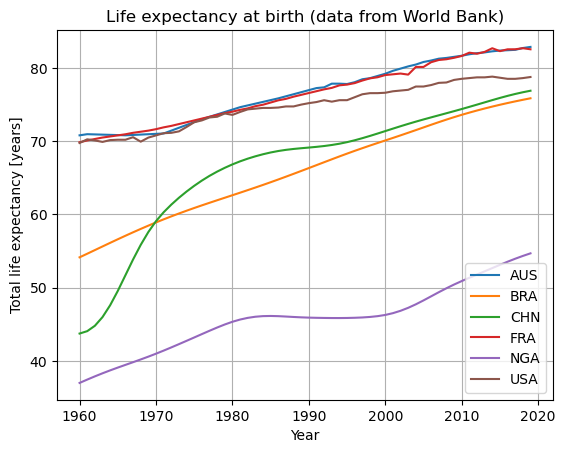

In [38]:
for code in Codes:
    plt.plot(leb['Year'],leb['Life exp. ('+code+')'],label=code)
plt.legend()
plt.grid()
plt.title('Life expectancy at birth (data from World Bank)')
plt.xlabel('Year')
plt.ylabel('Total life expectancy [years]')

Using the function `pairplot()` from the Seaborn module, univariate and bivariate statistical distributions are visualized in a matrix showing histograms on the main diagonal and scatter plots otherwise.

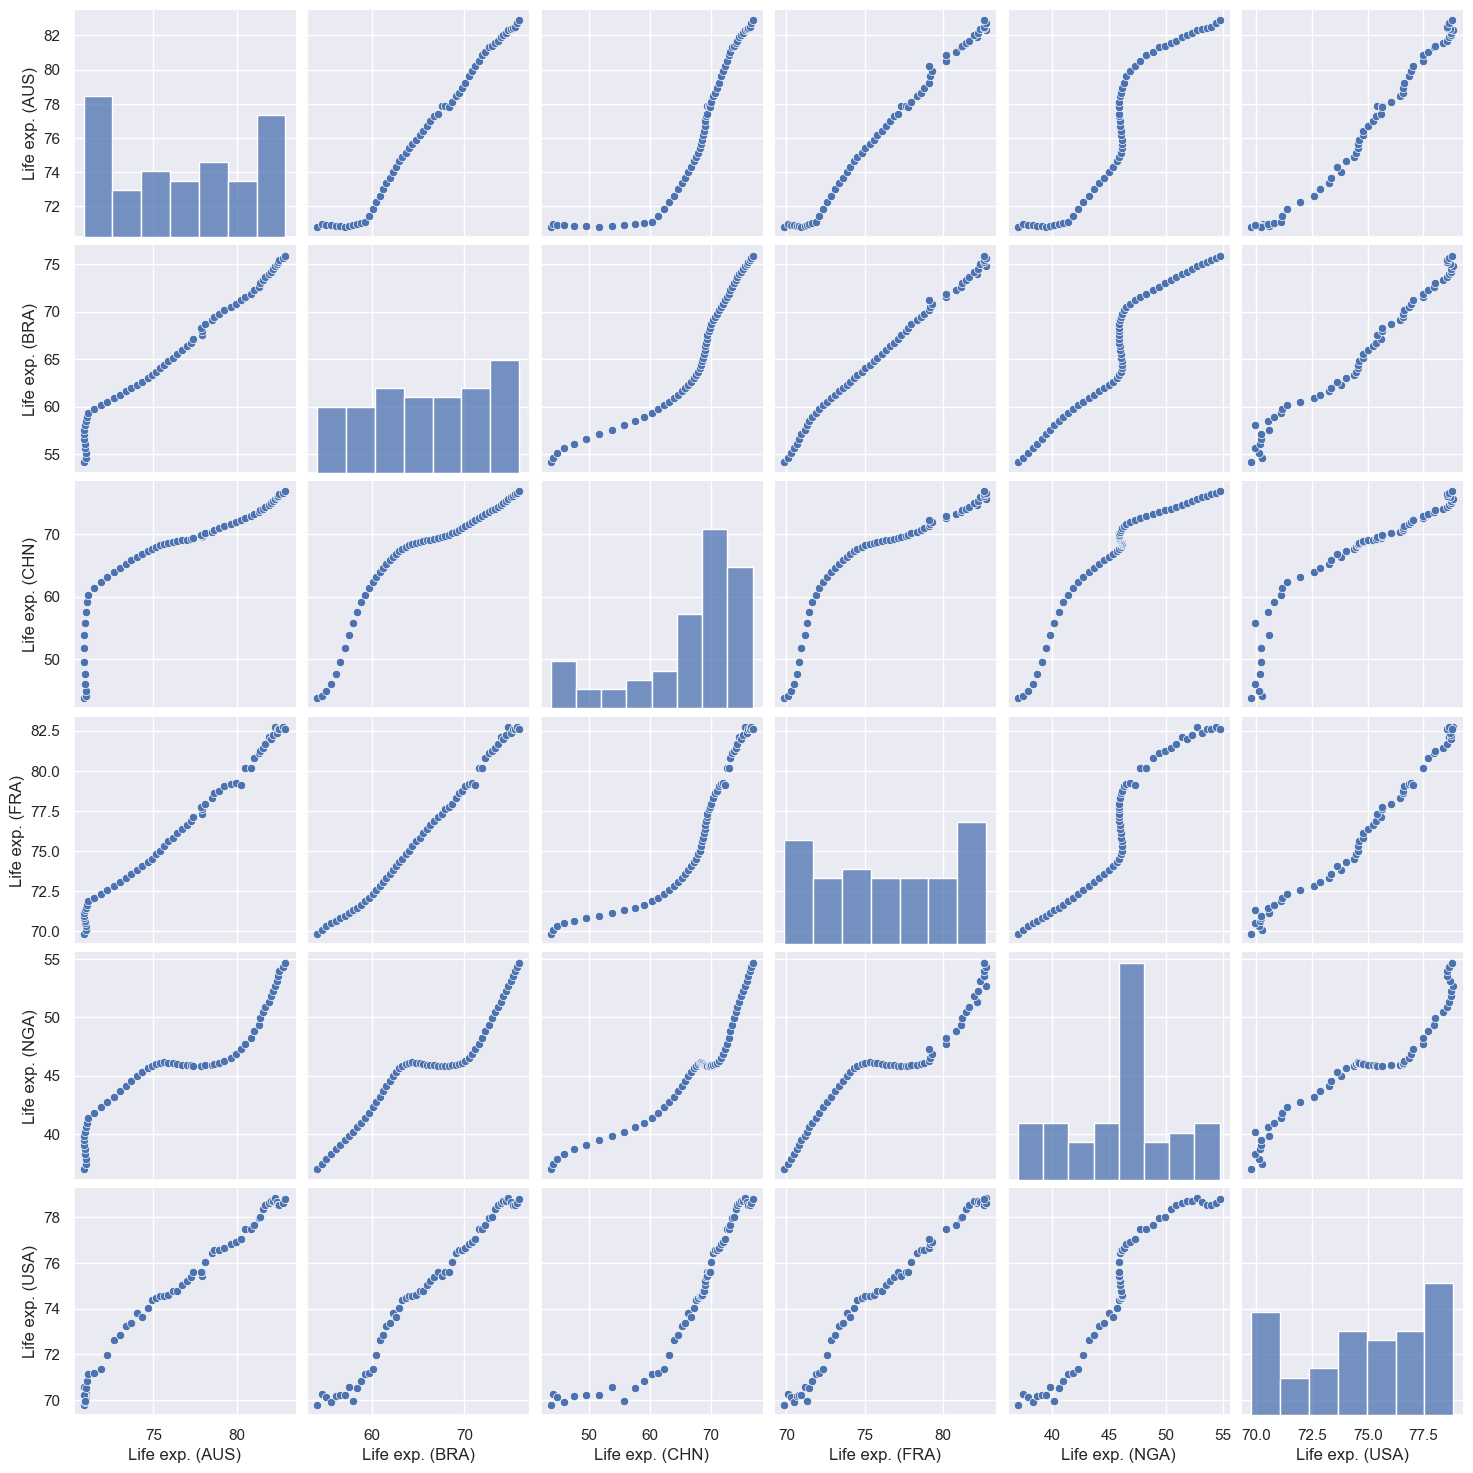

In [39]:
import seaborn as sns
sns.set()
sns.pairplot(leb.iloc[:,1:])

The function `describe()` is called to obtain basic statistics of the numerical data in the DataFrame.

In [40]:
leb.describe()

,Year,Life exp. (AUS),Life exp. (BRA),Life exp. (CHN),Life exp. (FRA),Life exp. (NGA),Life exp. (USA)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1989.500000,76.609390,65.980017,66.554167,76.469553,45.768700,74.806545
std,17.464249,4.194665,6.466277,8.935844,4.135138,4.476607,3.000358
min,1960.000000,70.817073,54.143000,43.725000,69.868293,36.976000,69.770732
25%,1974.750000,72.528049,60.791250,63.719750,72.791463,43.072500,72.442683
50%,1989.500000,76.854146,66.145000,69.099500,76.474390,45.911500,75.115854
75%,2004.250000,80.578049,71.622250,72.763000,80.163415,47.853000,77.487805
max,2019.000000,82.900000,75.881000,76.912000,82.724390,54.687000,78.841463


### Exercise: Life expectancy at birth 1960-2019

Using the life expectancy data from the file `life-expectancy-at-birth-total-years.csv`, construct a Pandas DataFrame with rows containing time series of data from the single countries, and columns containing the data from single years.

From the DataFrame `leb_full`, eliminate rows with undefined data using the Pandas function `.dropna()`. Identify the data for the year 1960 through a boolean array `ind_1960`. Construct a new DataFrame `leby` with data from the year 1960, then display the first five rows.

Successively add new columns of life expectancy data for each year in the range from 1961 to 2019. Display the first five rows final DataFrame.

*Note on computational efficiency*: This exercise is meant to illustrate DataFrame building using the methods introduced in the context of the current tutorial. More efficient Pandas tools exist, e.g., the `groupby()` method.

Call the function `describe()` to obtain a DataFrame `leby_stat` with basic statistics of the yearly distributions.

Plot time series of the yearly means, minima, quartiles, and maxima. 

---
---

## Solutions

### Solution: Pandas Series

In [ ]:
### Construct ser1970 from a dictionary.
ser1970 = pd.Series({'Bremen':592533,'Dresden':502432,'Essen':696419,'Stuttgart':634202})
print('Residents in the year 1970:')
print(ser1970)
### Construct ser1990 using a list of resident numbers and a separate index array.
ser1990 = pd.Series([551219,490571,626973,579988],
                    index=['Bremen','Dresden','Essen','Stuttgart'])
print('\nResidents in the year 1990:')
print(ser1990)
### Copy ser1990 to initialize ser2010, and then re-assign the four values.
ser2010 = ser1990.copy()
ser2010['Bremen'] = 547340
ser2010['Dresden'] = 523058
ser2010['Essen'] = 574635
ser2010['Stuttgart'] = 606588
print('\nResidents in the year 2010:')
print(ser2010)
### Compute the change from 1970 to 1990 and store in serdiff1
serdiff1 = 100*(ser1990-ser1970)/ser1970
print('\nPercentage change in resident number from 1970 to 1990:')
print(serdiff1)
### Compute the percentage change from 1990 to 2010 and store in serdiff2
serdiff2 = 100*(ser2010-ser1990)/ser1990
print('\nChange in resident number from 1990 to 2010:')
print(serdiff2)

### Solution: Pandas DataFrame

In [ ]:
### Define a Pandas DataFrame with columns 'x' and 'y'.
dfxy = pd.DataFrame({'x':np.arange(5,9),'y':np.arange(1,5)},index=list('abcd'))
### Add a new column 'x+y' with the sum of the columns 'x' and 'y'.
dfxy['x+y'] = dfxy['x']+dfxy['y']
### Add a new column 'x-y' with the difference of first two columns 'x' and 'y'.
dfxy['x-y'] = dfxy['x']-dfxy['y']
### Add a new column 'x*y' with the product of first two columns 'x' and 'y'.
dfxy['x*y'] = dfxy['x']*dfxy['y']
### Add a new column 'x/y' with the quotient of first two columns 'x' and 'y'.
dfxy['x/y'] = dfxy['x']/dfxy['y']
### Display the resulting DataFrame.
display(dfxy)
### Using .loc, extract (and display) the column labeled 'x+y'.
display(dfxy.loc[:,'x+y'])
### Using .iloc, extract  (and display) the row labeled 'c'.
display(dfxy.iloc[2,:])
### Using .loc, extract the sub-array with columns 'x-y','x/y' and rows 'b','c'.
display(dfxy.loc['b':'c',['x-y','x/y']])
### Using .iloc, extract the sub-array with columns 'x+y','x-y','x*y' and rows 'a','c'.
display(dfxy.iloc[[0,2],2:5])
### Using .drop(), remove the row 'c' and re-display the DataFrame.
dfxy.drop('c',axis=0,inplace=True)
display(dfxy)

### Solution: Life expectancy at birth 1960-2019

In [ ]:
### From leb_full eliminate rows with undefined data using .dropna(). 
leb_full.dropna(inplace=True)
### Identify the data for the year 1960 through a boolean array ind_1960. 
ind_1960 = leb_full['Year']==1960
### Construct a new DataFrame `leby` with data from the year 1960.
leby = pd.DataFrame({'Code':leb_full[ind_1960].iloc[:,1].values,
                    1960:leb_full[ind_1960].iloc[:,3].values})
### Display the first five rows of leby.
display(leby.head())

In [ ]:
### Successively add new columns of data for each year from 1961 to 2019.
for year in range(1961,2020):
    ind = leb_full['Year']==year
    leby = leby.merge(pd.DataFrame({'Code':leb_full[ind].iloc[:,1].values,
                                    year:leb_full[ind].iloc[:,3].values}))
### Display the first five rows final DataFrame.
display(leby.head())

In [ ]:
### Call describe() to obtain a DataFrame leby_stat with basic statistics.
leby_stat = leby.describe()
### Display the DataFrame.
display(leby_stat)

In [ ]:
### Plot time series of the yearly means, minima, quartiles, and maxima. 
for k in [1,3,4,5,6,7]:
    plt.plot(leby_stat.columns,leby_stat.iloc[k,:],label=leby_stat.index[k])
plt.legend()
plt.title('Life expectancy statistics (data from World Bank)')
plt.xlabel('Year')
plt.ylabel('Total life expectancy [years]')

---
---